In [46]:
import numpy as np
import statsmodels.tsa.seasonal as sea
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [47]:
str(dt.datetime(2020, 1, 1) + dt.timedelta(10))

'2020-01-11 00:00:00'

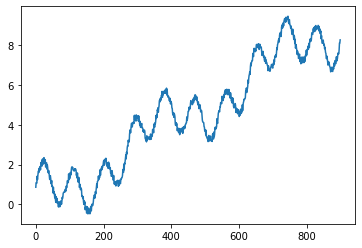

In [126]:
dnu = 0.01*np.arange(900) + np.sin(0.07*np.arange(900)) + np.cos(0.0175*np.arange(900)) + np.random.rand(900)*0.4-0.2
data = {'dnu': dnu}
data = pd.DataFrame(data, index=pd.date_range('1/1/2020', periods=900, freq='d'))
plt.plot(dnu)

In [127]:
data

,dnu
2020-01-01,0.856490
2020-01-02,1.089178
2020-01-03,1.078697
2020-01-04,1.060994
2020-01-05,1.409464
...,...
2022-06-14,7.581843
2022-06-15,7.784079
2022-06-16,8.122931
2022-06-17,8.118732


In [133]:
de = sea.seasonal_decompose(data, two_sided=False, period=90)
data_des = data['dnu']-de.seasonal
des = sea.seasonal_decompose(data_des, two_sided=False, period=360)

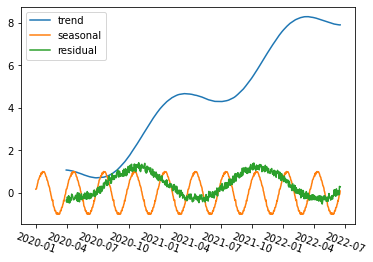

In [131]:
plt.plot(de.trend, label='trend')
plt.plot(de.seasonal, label='seasonal')
plt.plot(de.resid, label='residual')
plt.xticks(rotation=-20)
plt.legend()

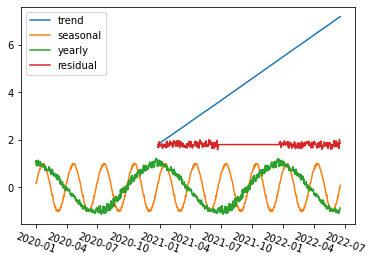

In [134]:
plt.plot(des.trend, label='trend')
plt.plot(de.seasonal, label='seasonal')
plt.plot(des.seasonal, label='yearly')
plt.plot(des.resid, label='residual')
plt.xticks(rotation=-20)
plt.legend()